# Training the Model

In [ ]:
# # Test images (For quick training)
# coco_annotation_file = r'training_data/coco2/result.json'
# image_dir = r'training_data/coco2/'

# Complete Dataset
coco_annotation_file = r'training_data/coco2-full/result.json'
image_dir = r'training_data/coco2-full/'

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
num_classes: 3
Training on cuda
Sample Image Shape: torch.Size([3, 1600, 2560])
GT Box: [1222.6123046875, 420.3401794433594, 1307.846923828125, 515.4680786132812]


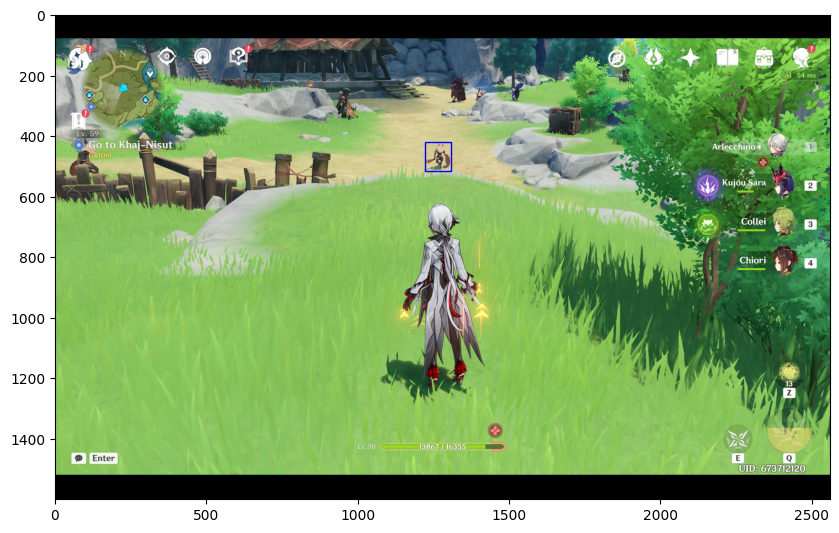

Epoch 1, Loss: 0.8450352224436674
Pred Box: [1848.63916015625, 928.4713745117188, 2041.98681640625, 1468.60791015625], Score: 0.21035972237586975, Label: 1
Pred Box: [1216.127685546875, 796.8058471679688, 1663.179443359375, 1266.009765625], Score: 0.20385950803756714, Label: 1
Pred Box: [1851.8751220703125, 927.825927734375, 2050.732666015625, 1473.2279052734375], Score: 0.18529751896858215, Label: 2
Pred Box: [1725.0396728515625, 366.33148193359375, 1990.005859375, 632.1943359375], Score: 0.1623098999261856, Label: 1


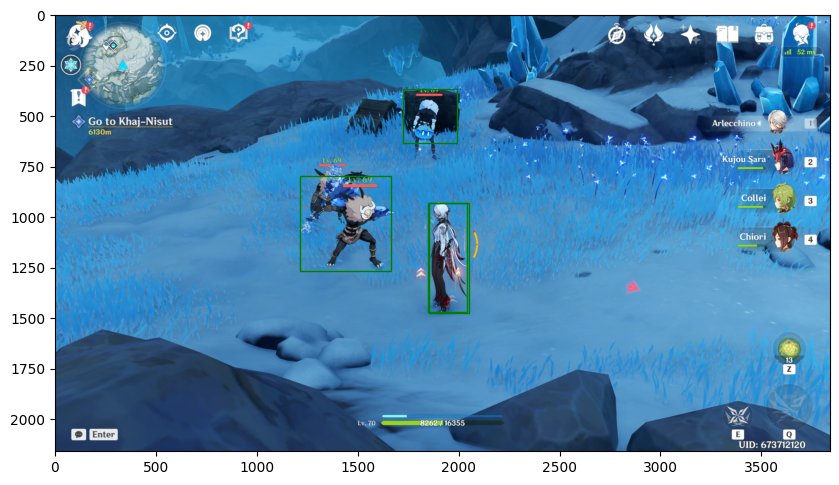

Epoch 2, Loss: 0.4874185703017495
Pred Box: [1788.62353515625, 943.6719360351562, 1983.076416015625, 1457.3056640625], Score: 0.23306281864643097, Label: 1
Pred Box: [2240.016845703125, 919.2379150390625, 2606.1123046875, 1275.6329345703125], Score: 0.21681827306747437, Label: 1
Pred Box: [2605.7666015625, 887.6565551757812, 2826.78564453125, 1135.14501953125], Score: 0.21615736186504364, Label: 1
Pred Box: [1794.834228515625, 932.0101928710938, 1988.574951171875, 1460.71484375], Score: 0.21221038699150085, Label: 2


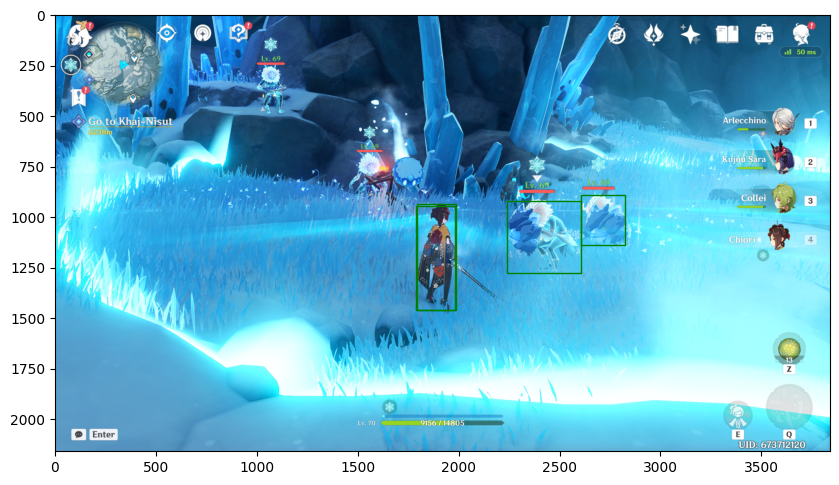

c:\Users\samue\Documents\genshin-HUD\.env\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 3, Loss: 0.45888245647603815
Pred Box: [2031.468017578125, 1232.5257568359375, 2443.09033203125, 1632.00537109375], Score: 0.2513127624988556, Label: 1
Pred Box: [1812.8392333984375, 923.8250122070312, 1986.00244140625, 1435.339111328125], Score: 0.2005428820848465, Label: 1
Pred Box: [2267.352294921875, 697.8698120117188, 2392.681884765625, 915.1151123046875], Score: 0.16560539603233337, Label: 1
Pred Box: [1858.9638671875, 995.1902465820312, 2068.23095703125, 1452.10595703125], Score: 0.15318262577056885, Label: 1


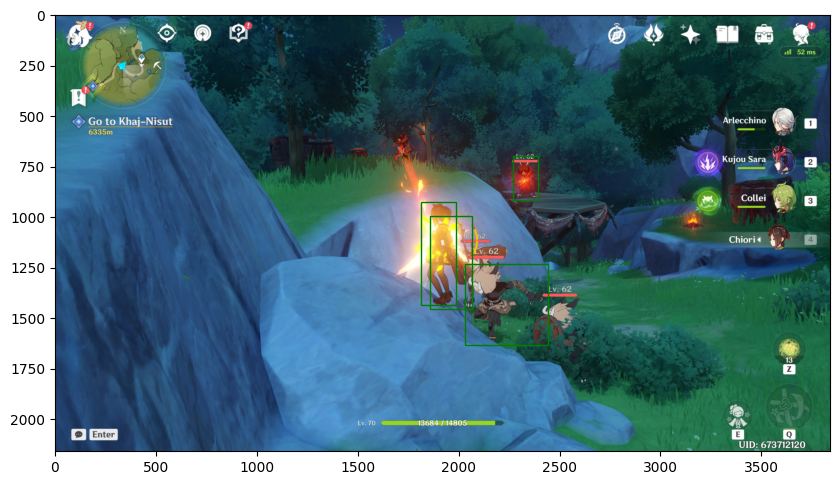

Epoch 4, Loss: 0.45029389316385443
Pred Box: [60.17543411254883, 7.64708948135376, 186.83509826660156, 215.72486877441406], Score: 0.2613414227962494, Label: 1
Pred Box: [919.8448486328125, 857.174560546875, 1089.1002197265625, 1037.88671875], Score: 0.2123846411705017, Label: 1
Pred Box: [62.340579986572266, 8.284685134887695, 188.71690368652344, 220.70184326171875], Score: 0.1681973934173584, Label: 2


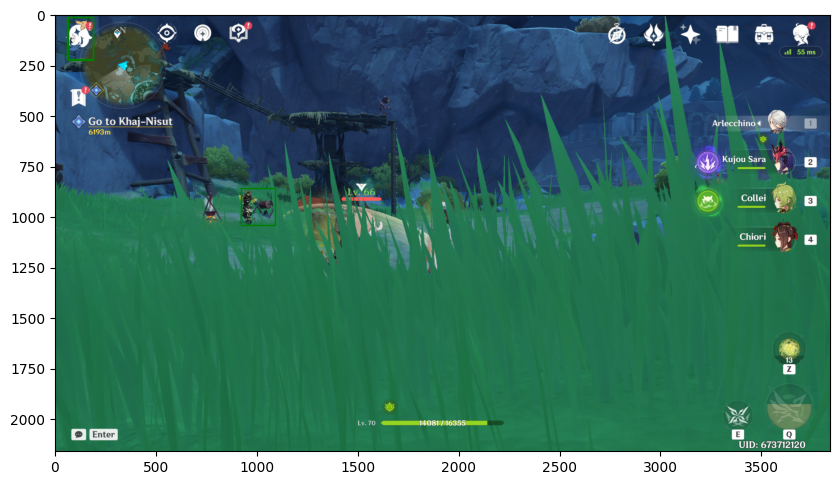

Epoch 5, Loss: 0.43942517042160034
Pred Box: [2436.888916015625, 1552.131591796875, 2642.6875, 1875.98193359375], Score: 0.3579626679420471, Label: 1
Pred Box: [2330.116455078125, 1525.908203125, 2726.995361328125, 1833.65380859375], Score: 0.17182862758636475, Label: 1


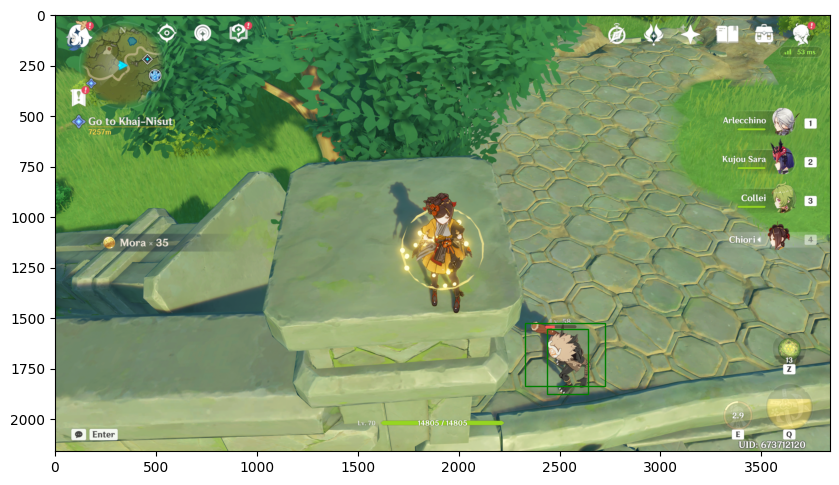

Epoch 6, Loss: 0.43332111835479736
Pred Box: [1383.856689453125, 320.06695556640625, 1456.28125, 401.6126708984375], Score: 0.3593635857105255, Label: 1
Pred Box: [1600.85498046875, 152.24551391601562, 1650.785400390625, 241.82742309570312], Score: 0.3590673506259918, Label: 1
Pred Box: [1779.434814453125, 412.7264404296875, 1853.37255859375, 506.94464111328125], Score: 0.34607696533203125, Label: 1
Pred Box: [2433.912109375, 106.41912841796875, 2514.5107421875, 185.31369018554688], Score: 0.3342147469520569, Label: 1
Pred Box: [1530.1800537109375, 153.13192749023438, 1551.7625732421875, 186.97592163085938], Score: 0.26913538575172424, Label: 1
Pred Box: [1659.310791015625, 190.00408935546875, 1704.69384765625, 236.92031860351562], Score: 0.24493835866451263, Label: 1
Pred Box: [1584.49853515625, 144.16845703125, 1672.977783203125, 247.72689819335938], Score: 0.22980260848999023, Label: 1
Pred Box: [1173.0074462890625, 664.9873046875, 1382.5655517578125, 1143.6878662109375], Score: 0.2

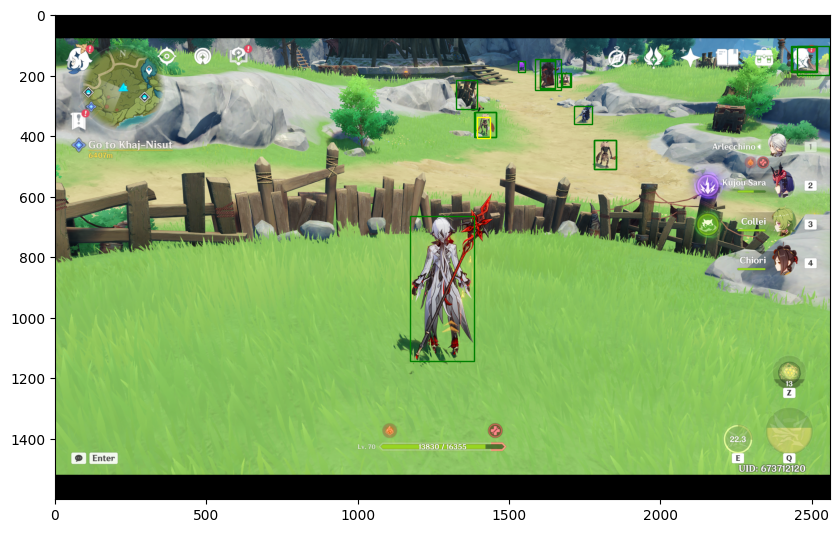

Model saved.
Training complete.


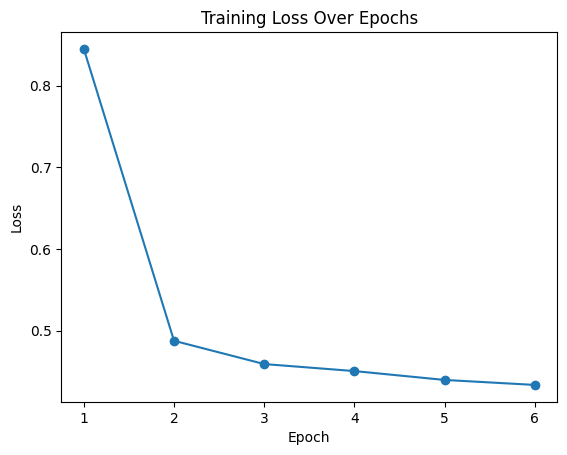

In [8]:
import os
import numpy as np
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, fasterrcnn_resnet50_fpn_v2
from torch.utils.data import DataLoader
from torchvision.ops import nms as torchvision_nms
from pycocotools.coco import COCO
from PIL import Image
from torchvision.transforms import functional as F
import random
import matplotlib.pyplot as plt

# Generate a random seed
seed = random.choice(range(1, 1000))

# Set the seed for reproducibility
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Load COCO dataset
coco = COCO(coco_annotation_file)

# Custom transformation to handle both image and target
class ToTensor(object):
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

# Data augmentation and transformation
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

transform = Compose([
    ToTensor(),
])

# Create a custom dataset class
class COCODataset(torch.utils.data.Dataset):
    def __init__(self, coco, image_dir, transform=None):
        self.coco = coco
        self.image_dir = image_dir
        self.transform = transform
        self.ids = list(self.coco.imgs.keys())
    
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self, index):
        img_id = self.ids[index]
        img_info = self.coco.imgs[img_id]
        img_path = os.path.join(self.image_dir, img_info['file_name'])
        img = Image.open(img_path).convert("RGB")
        
        ann_ids = self.coco.getAnnIds(imgIds=img_id)
        anns = self.coco.loadAnns(ann_ids)
        
        boxes = []
        labels = []
        for ann in anns:
            bbox = ann['bbox']
            xmin, ymin, width, height = bbox
            xmax = xmin + width
            ymax = ymin + height

            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(ann['category_id'])
        
        # Debugging prints
        # print(f"Image ID: {img_id}, Number of Annotations: {len(anns)}")
        # print(f"Boxes: {boxes}")
        
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        
        if self.transform is not None:
            img, target = self.transform(img, target)
        
        return img, target

# Create dataset
dataset = COCODataset(coco, image_dir, transform)

# # Override the NMS function to use the CPU implementation
# def nms(boxes, scores, iou_threshold):
#     return torchvision_nms(boxes.cpu(), scores.cpu(), iou_threshold)

def nms(boxes, scores, iou_threshold):
    return torchvision_nms(boxes.to(device), scores.to(device), iou_threshold)

torchvision.ops.nms = nms

# Load a pre-trained Faster R-CNN model with updated weights parameter
weights = torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1
model = fasterrcnn_resnet50_fpn_v2(weights=weights)

# Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Define the number of classes (including background)
num_classes = len(coco.cats) + 1  # COCO categories + background
print(f"num_classes: {num_classes}")

# Replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Define training parameters
batch_size = 7
num_epochs = 6
learning_rate = 0.001

# Create a DataLoader
def collate_fn(batch):
    return tuple(zip(*batch))

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

# Move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Training on {device}")
model.to(device)

# Define optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]

#optimizer = torch.optim.Adam(params, lr=learning_rate)  # Use Adam optimizer
#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Function to visualize a sample prediction
def visualize_sample_prediction(image, prediction, ax):
    boxes = prediction['boxes'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()
    
    # Compute quantiles
    q1, q2, q3 = np.quantile(scores, [0.25, 0.5, 0.75])
    
    # Assign colors based on quantiles
    def get_color(score):
        if score <= q1:
            return 'red'
        elif score <= q2:
            return 'orange'
        elif score <= q3:
            return 'yellow'
        else:
            return 'green'
    
    for box, score, label in zip(boxes, scores, labels):
        if score > 0.15:  # Only visualize confident predictions
            xmin, ymin, xmax, ymax = box
            print(f"Pred Box: [{xmin}, {ymin}, {xmax}, {ymax}], Score: {score}, Label: {label}")  # Debugging print
            color = get_color(score)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=color)
            ax.add_patch(rect)

# Function to visualize ground truth annotations
def visualize_ground_truth(image, target, ax):
    boxes = target['boxes'].cpu().numpy()
    labels = target['labels'].cpu().numpy()

    for box in boxes:
        xmin, ymin, xmax, ymax = box
        print(f"GT Box: [{xmin}, {ymin}, {xmax}, {ymax}]")  # Debugging print

        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='blue')
        ax.add_patch(rect)

# Visualize a sample ground truth
sample_image, sample_target = dataset[0]
print(f"Sample Image Shape: {sample_image.shape}")  # Debugging print
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(sample_image.permute(1, 2, 0).numpy())
visualize_ground_truth(sample_image, sample_target, ax)
plt.show()


# Training loop
losses_per_epoch = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, targets in data_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)

        # Compute total loss
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
    
    # Update the learning rate
    lr_scheduler.step()
    
    # Store the average loss for the epoch
    avg_epoch_loss = epoch_loss / len(data_loader)
    losses_per_epoch.append(avg_epoch_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_epoch_loss}")
    
    # Visualize a sample prediction from the first image in the batch
    model.eval()
    with torch.no_grad():
        sample_image = images[0]
        sample_prediction = model([sample_image])[0]
        
        # Convert image to numpy array for visualization
        sample_image_np = sample_image.permute(1, 2, 0).cpu().numpy()
        
        # Plot the image and overlay the prediction
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        ax.imshow(sample_image_np)
        visualize_sample_prediction(sample_image, sample_prediction, ax)
        plt.show()
    model.train()
    model.eval()



# Save the trained model
torch.save(model.state_dict(), 'fasterrcnn_model.pth')
print("Model saved.")

print("Training complete.")
# Plot the training loss
plt.figure()
plt.plot(range(1, num_epochs + 1), losses_per_epoch, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()



# Testing on a new picture

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


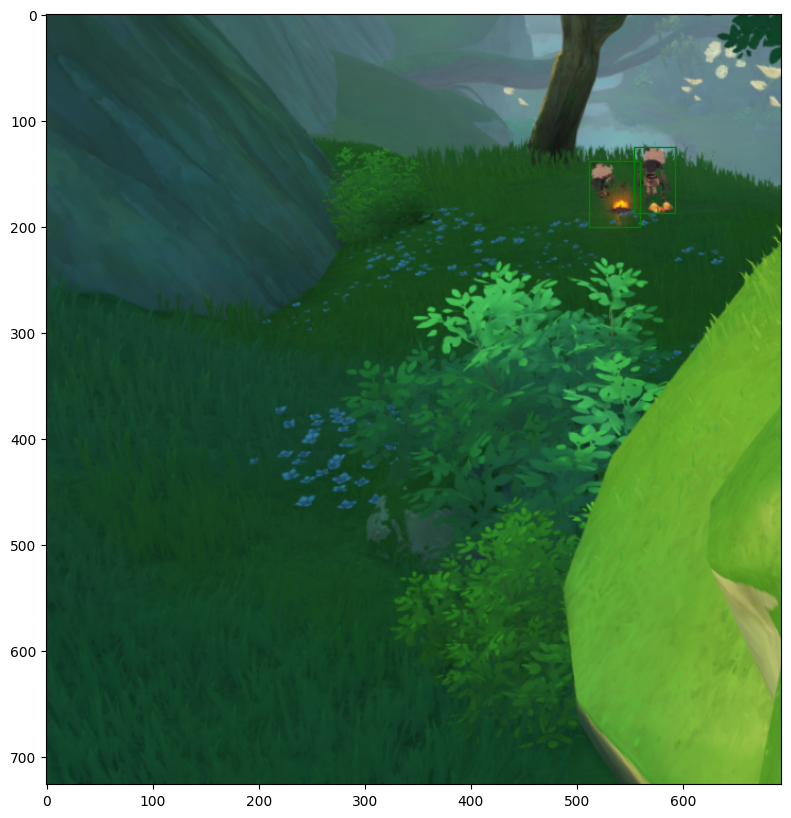

In [7]:
import os
import torch
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor, fasterrcnn_resnet50_fpn_v2
from torchvision.transforms import functional as F
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO

# Define the path to the saved model and the new image
model_path = 'fasterrcnn_model.pth'
new_image_path = 'image.png'

# Load the COCO dataset (for category labels)
coco_annotation_file = r'training_data/coco2-full/result.json'
coco = COCO(coco_annotation_file)
num_classes = len(coco.cats) + 1  # COCO categories + background

# Load the pre-trained Faster R-CNN model
weights = torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1
model = fasterrcnn_resnet50_fpn_v2(weights=weights)

# Replace the pre-trained head with a new one
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the trained weights
model.load_state_dict(torch.load(model_path))
model.eval()

# Move the model to the appropriate device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Function to visualize predictions
def visualize_sample_prediction(image, prediction, ax):
    boxes = prediction['boxes'].cpu().numpy()
    scores = prediction['scores'].cpu().numpy()
    labels = prediction['labels'].cpu().numpy()

    # Compute quantiles
    q1, q2, q3 = np.quantile(scores, [0.25, 0.5, 0.75])

    # Assign colors based on quantiles
    def get_color(score):
        if score <= q1:
            return 'red'
        elif score <= q2:
            return 'orange'
        elif score <= q3:
            return 'yellow'
        else:
            return 'green'

    for box, score, label in zip(boxes, scores, labels):
        if score > 0.7:  # Only visualize confident predictions
            xmin, ymin, xmax, ymax = box
            color = get_color(score)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color=color)
            ax.add_patch(rect)

# Load and preprocess the new image
image = Image.open(new_image_path).convert("RGB")
image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

# Run the image through the model
with torch.no_grad():
    prediction = model(image_tensor)[0]

# Visualize the prediction
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(image)
visualize_sample_prediction(image_tensor[0], prediction, ax)
plt.show()


# Examples of Convolution Kernel Processing

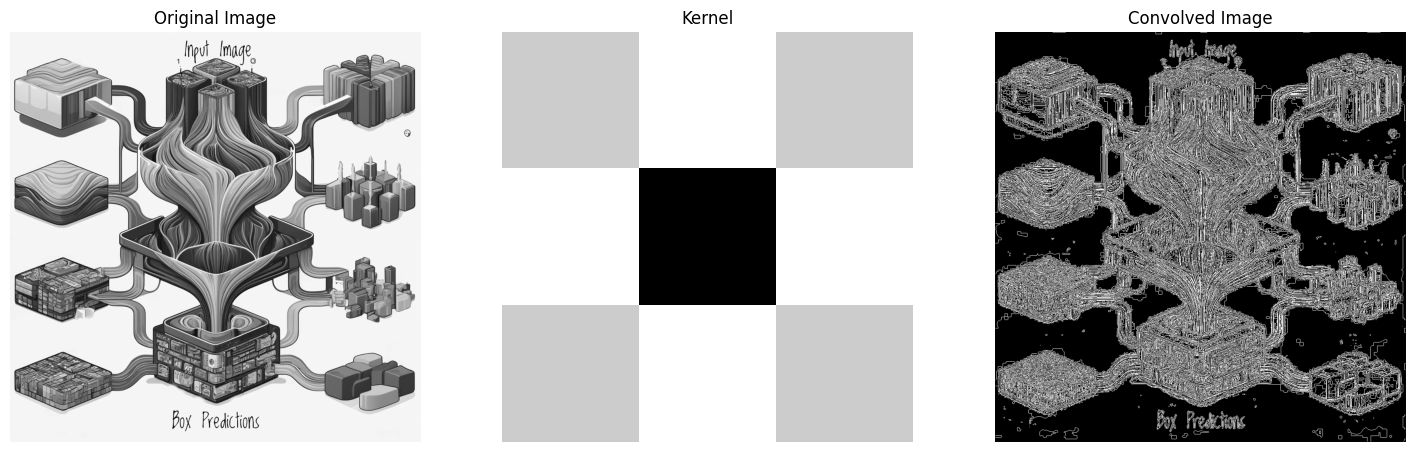

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image and convert it to grayscale
image = cv2.imread('pic.png', cv2.IMREAD_GRAYSCALE)

# Define a kernel (e.g., an edge detection kernel)
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Function to apply convolution
def apply_convolution(image, kernel):
    # Get the dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Define the output image with the same dimensions as the input image
    output = np.zeros_like(image)

    # Pad the image to handle borders
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Apply the kernel to each pixel in the image
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Apply the kernel (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)
    
    return output

# Apply the convolution
convolved_image = apply_convolution(image, kernel)

# Plot the original image, the kernel, and the convolved image
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel (visualized as an image)
axs[1].imshow(kernel, cmap='gray', interpolation='nearest')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolved image
axs[2].imshow(convolved_image, cmap='gray')
axs[2].set_title('Convolved Image')
axs[2].axis('off')

plt.show()


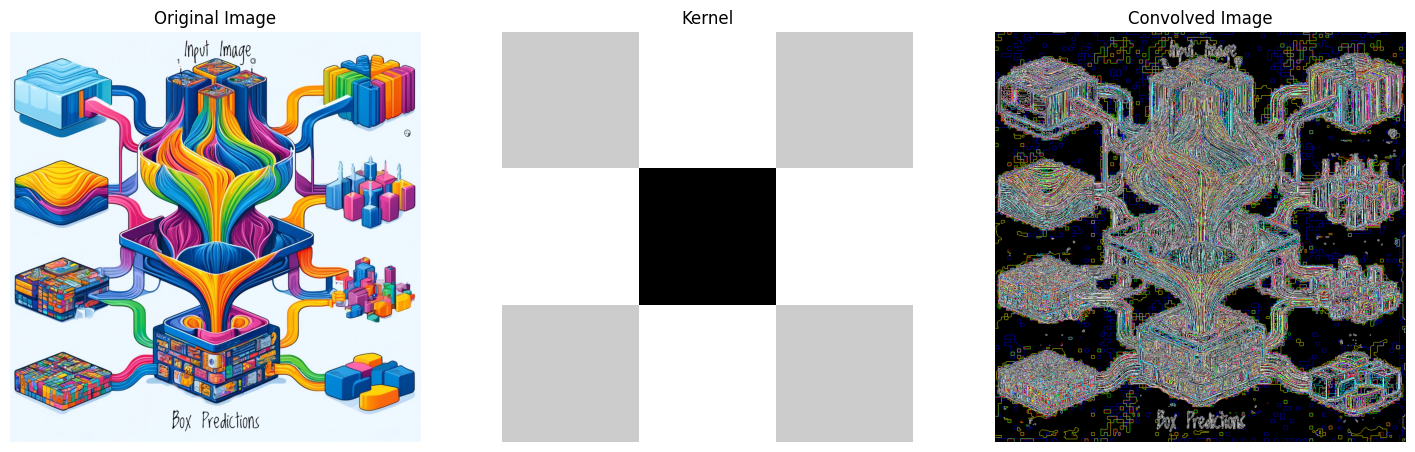

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image in color
image = cv2.imread('pic.png')

# Convert BGR (OpenCV default) to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define a kernel (e.g., an edge detection kernel)
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Function to apply convolution to a single channel
def apply_convolution(channel, kernel):
    # Get the dimensions of the channel and the kernel
    channel_height, channel_width = channel.shape
    kernel_height, kernel_width = kernel.shape

    # Define the output channel with the same dimensions as the input channel
    output = np.zeros_like(channel)

    # Pad the channel to handle borders
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_channel = np.pad(channel, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Apply the kernel to each pixel in the channel
    for i in range(channel_height):
        for j in range(channel_width):
            # Extract the region of interest
            region = padded_channel[i:i + kernel_height, j:j + kernel_width]
            # Apply the kernel (element-wise multiplication and sum)
            output[i, j] = np.sum(region * kernel)
    
    return output

# Split the image into its Red, Green, and Blue channels
red_channel, green_channel, blue_channel = cv2.split(image_rgb)

# Apply the convolution to each channel
convolved_red = apply_convolution(red_channel, kernel)
convolved_green = apply_convolution(green_channel, kernel)
convolved_blue = apply_convolution(blue_channel, kernel)

# Merge the convolved channels back into a single image
convolved_image = cv2.merge((convolved_red, convolved_green, convolved_blue))

# Clip the values to the valid range [0, 255] and convert to uint8
convolved_image = np.clip(convolved_image, 0, 255).astype(np.uint8)

# Plot the original image, the kernel, and the convolved image
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel (visualized as an image)
axs[1].imshow(kernel, cmap='gray', interpolation='nearest')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolved image
axs[2].imshow(convolved_image)
axs[2].set_title('Convolved Image')
axs[2].axis('off')

plt.show()
